In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2hsv, hsv2rgb
import cv2

## Pseudo color processing of gray-scale images 

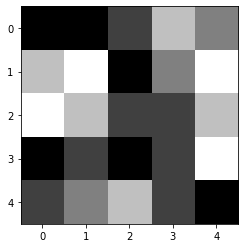

In [ ]:
gray_img = np.random.randint(5, size=(5,5))
plt.imshow(gray_img,cmap='gray')

In [ ]:
color_map=[[255,0,123],[120,100,210],[140,200,290],[0,0,255],[10,210,190]]

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


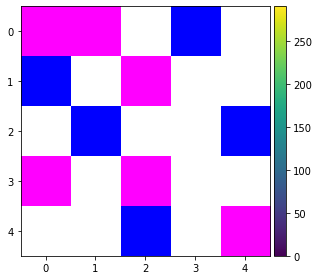

In [ ]:
r=np.zeros((5,5))
g=np.zeros((5,5))
b=np.zeros((5,5))
for i in range(gray_img.shape[0]):
  for j in range(gray_img.shape[1]):
    r[i][j]=color_map[gray_img[i][j]][0]
    g[i][j]=color_map[gray_img[i][j]][1]
    b[i][j]=color_map[gray_img[i][j]][2]
pseudo_color_img=np.stack((r,g,b),axis=-1)
imshow(pseudo_color_img)

## Segmentation in HSI color space

In [ ]:
img = imread('/content/drive/MyDrive/rose.jpg')

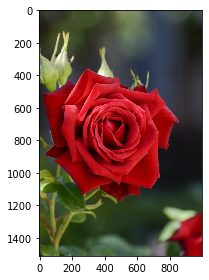

In [ ]:
imshow(img)

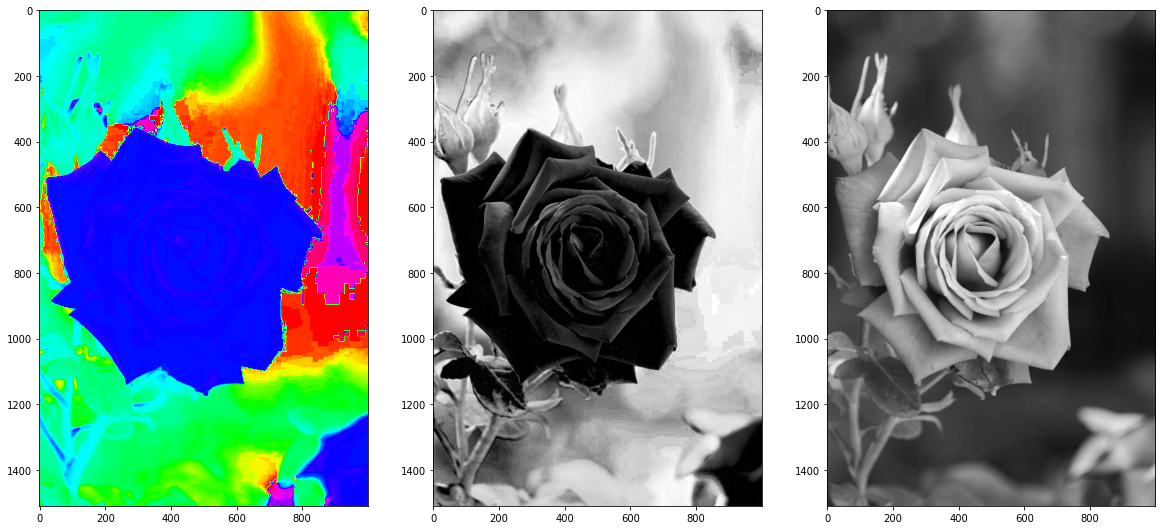

In [ ]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(20,30))
plt.subplot(131)
plt.imshow(img_hsv[:,:,0],cmap='hsv')
plt.subplot(132)
plt.imshow(img_hsv[:,:,1],cmap='Greys')
plt.subplot(133)
plt.imshow(img_hsv[:,:,2],cmap='gray')
plt.show()

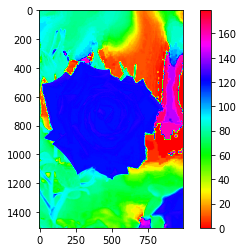

In [ ]:

plt.imshow(img_hsv[:,:,0],cmap='hsv')
plt.colorbar()

In [ ]:
print(img_hsv.shape)

(1510, 1000, 3)


In [ ]:
mask = np.zeros((1510,1000),dtype=int)
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if(img_hsv[i][j][0]>=110 and img_hsv[i][j][0]<=130):
      mask[i][j]=1
print(mask.shape,np.unique(mask))

(1510, 1000) [0 1]


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


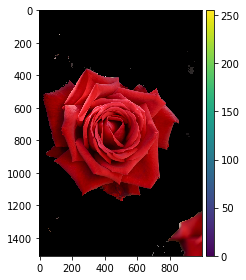

In [ ]:
r = img[:,:,0]*mask
g = img[:,:,1]*mask
b = img[:,:,2]*mask
final_img = np.dstack((r,g,b))
imshow(final_img)